# Project - Looking at No-shows Appointments Data

The data set that is being explored is the No-Show Appointments.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

The original source is from Kaggle.
https://www.kaggle.com/joniarroba/noshowappointments


## Looking at the what variables are related to no-show appointments
<br>
(1) Age distribution visualization
<br>
(2) Does texting decrease no-shows?
<br>
(3) Who visits the the doctor more (men or women)?
<br>
(4) Are Scholarship (Brazilian welfare) patients higher no-shows?
<br>
(5) Appointments Scheduled by Day of Week

<b>Creator: Bill Glennon
<br>
<b>Date: April 14, 2018

# Outline

## 1. Environment Preparation

## 2. Data Wrangling

## 3. Variable Data Analysis  
   a. Age distribution visualization
   <br>
   b. Analysis of the Data
   <br>
   <br>
   c. Texting
   <br>
   d. Analysis of the Data
   <br>
   <br>
   e. Men or women visit the doctor more?
   <br>
   f. Analysis of the Data
   <br>
   <br>
   g. Sholarship (Brazilain Welfare)
   <br>
   h. Analysis of the Data
   <br>
   <br>
   i. Appointments Scheduled by Day of Week
   <br>
   j. Analysis of the Data
   <br>
   
 ## 4. Conclusions
 
 ## 5. Resources
   

# 1. Environment Preparation

In [1]:
# import required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show


In [2]:
# Read in the data file
noshows_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [3]:
# See number of rows and columns
noshows_df.shape


(110527, 14)

# 2. Data Wrangling

In [4]:
# get info on the file e.g. data types and counts
noshows_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Fix typos of column names or to names I like
noshows_df = noshows_df.rename(columns={'Hipertension': 'Hypertension', 'No-show': 'Status', 'Handcap': 'Handicap', 'SMS_received': 'Text'})


In [6]:
# Take a look at the data 
noshows_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Text,Status
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# I would like to add day of week to the DataFrame in case I want to do analysis on day of week. 
#You need to convert ScheduledDay to a datetime type
noshows_df['ScheduledDay'] = pd.to_datetime(noshows_df['ScheduledDay'])
noshows_df['day_of_week'] = noshows_df['ScheduledDay'].dt.weekday_name


In [8]:
# Show the  columns
print noshows_df.columns


Index([u'PatientId', u'AppointmentID', u'Gender', u'ScheduledDay',
       u'AppointmentDay', u'Age', u'Neighbourhood', u'Scholarship',
       u'Hypertension', u'Diabetes', u'Alcoholism', u'Handicap', u'Text',
       u'Status', u'day_of_week'],
      dtype='object')


In [9]:
# Take a look at a few records
noshows_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Text,Status,day_of_week
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [10]:
# Take a look at the data and see if you see any outliers

print('Gender:',sorted(noshows_df.Gender.unique()))
print('')
print('Age:',sorted(noshows_df.Age.unique()))
print('')
print('Scholarship:',sorted(noshows_df.Scholarship.unique()))
print('')
print('Hypertension:',sorted(noshows_df.Hypertension.unique()))
print('')
print('Diabetes:',sorted(noshows_df.Diabetes.unique()))
print('')
print('Alcoholism:',sorted(noshows_df.Alcoholism.unique()))
print('')
print('Handicap:',sorted(noshows_df.Handicap.unique()))
print('')
print('Text Sent:',sorted(noshows_df.Text.unique()))
print('')
print('Status:',sorted(noshows_df.Status.unique()))
print('')
print('Day of Week:',sorted(noshows_df.day_of_week.unique()))


('Gender:', ['F', 'M'])

('Age:', [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115])

('Scholarship:', [0, 1])

('Hypertension:', [0, 1])

('Diabetes:', [0, 1])

('Alcoholism:', [0, 1])

('Handicap:', [0, 1, 2, 3, 4])

('Text Sent:', [0, 1])

('Status:', ['No', 'Yes'])

('Day of Week:', ['Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday'])


In [11]:
# Clean up Age Remove negative age -1 and keep the data set between 1 and 99
noshows_df = noshows_df[(noshows_df.Age >= 1) & (noshows_df.Age <= 99)]


In [12]:
# Number of rows and columns were (110527, 14) before data wrangling
# Removed rows that had ages =< 0 and > 99
# Added column day_of_week
noshows_df.shape


(106976, 15)

In [13]:
# Counts of no shows - Yes is the number of no shows
noshows_df.groupby('Status').size()


Status
No     85299
Yes    21677
dtype: int64

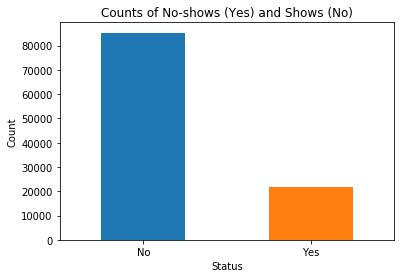

In [14]:
# Plot the no-show (Status) colun
# Yes is the number of no-shows
my_plot = noshows_df['Status'].value_counts().plot(kind='bar',title="Counts of No-shows (Yes) and Shows (No)")
my_plot.set_xlabel("Status")
plt.xticks(rotation=0)
my_plot.set_ylabel("Count")
plt.show()


# Analysis

About 20 percent (22,316/110,515) are no-shows.

# 3. Variable Data Analysis

# Analysis (1) Age distribution visualization 

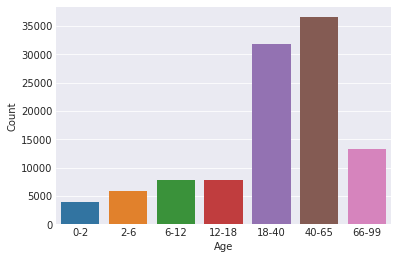

In [15]:
# Visualizatiion of age distribution

sns.set_style("darkgrid")
bins = [0,2,6,12,18,40,65,99]
labels=["0-2","2-6","6-12","12-18","18-40", "40-65","66-99"]

age_cat = pd.cut(noshows_df.Age,bins,labels=labels)
noshows_df['Age_cat'] = age_cat

groups = noshows_df.groupby(['Age_cat'])
gps = groups.size()
age_dist = sns.barplot(x=gps.index.tolist(), y=gps.values)
age_dist.set(xlabel = 'Age', ylabel = 'Count')
plt.show()


# Recap of  Analysis (1) Age distribution visualization 

The highest percentage of patients is between the age of 40 to 65. The majority of patients are between ages 18 and 65.

# Analysis (2) Does texting decrease no-shows? 

In [16]:
# Look at the number of patients texted
noshows_df.groupby(['Text']).size()


Text
0    72393
1    34583
dtype: int64

In [17]:
# Look at texting and no-shows
noshows_df.groupby(['Text', 'Status']).size()


Text  Status
0     No        60284
      Yes       12109
1     No        25015
      Yes        9568
dtype: int64

In [18]:
# Get an initial feel of the data with crosstab
pd.crosstab(noshows_df["Text"], noshows_df["Status"],margins=True)


Status,No,Yes,All
Text,,,
0,60284,12109,72393
1,25015,9568,34583
All,85299,21677,106976


In [19]:
# Show percentages looking at rows
pd.crosstab(noshows_df["Text"], noshows_df["Status"], normalize='index')


Status,No,Yes
Text,,
0,0.832732,0.167268
1,0.723332,0.276668


In [20]:
# Show percentages looking at columns
pd.crosstab(noshows_df["Text"], noshows_df["Status"], normalize='columns')


Status,No,Yes
Text,,
0,0.706737,0.558611
1,0.293263,0.441389


In [21]:
# Make a Panda Series of the groupby data
grouped = noshows_df.groupby(['Text', 'Status']).size()
grouped


Text  Status
0     No        60284
      Yes       12109
1     No        25015
      Yes        9568
dtype: int64

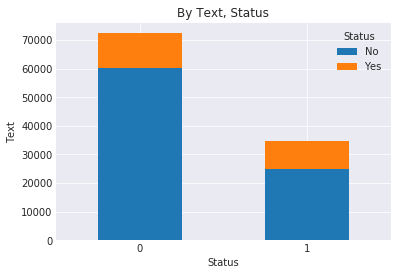

In [22]:
# Barplot visualization of the data

my_plot = grouped.unstack().plot(kind='bar',stacked=True,title="By Text, Status")
my_plot.set_xlabel("Status")
plt.xticks(rotation=0)
my_plot.set_ylabel("Text")
plt.show()


# Recap of Analysis (2) Does texting decrease no-shows? 

The answer appears no, texting does not decrease the number of no-shows. From the plot, the percentages look very similar for the number of no-shows of people who received a text and people who did not received the text. 

In addition, the precetnage actaully goes up for no-shows when texting.

Finally, about 68% percent did not receive a text. This would be interesting to explore further of why? Is it because majority of people do not have cell phones? The hospital does not have good or detail information on their patients?


# Analysis (3) Who visits the the doctor more (men or women)?

In [23]:
# Look at the number of male and female patients
noshows_df.groupby('Gender').size()


Gender
F    70109
M    36867
dtype: int64

In [24]:
# Look at gender and no-shows
noshows_df.groupby(['Gender', 'Status']).size()


Gender  Status
F       No        55837
        Yes       14272
M       No        29462
        Yes        7405
dtype: int64

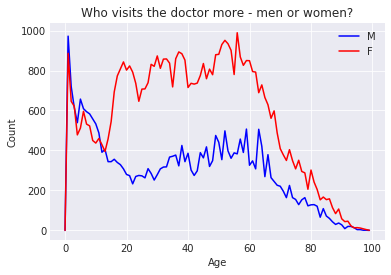

In [25]:
# Visualization of males and females that went to their appointments by age
df = noshows_df[noshows_df.Status == 'No']
range_df = pd.DataFrame()
range_df['Age'] = range(100)
men = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'M')]))
women = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'F')]))
plt.plot(range(100),men, 'b')
plt.plot(range(100),women, color = 'r')
plt.legend(['M','F'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Who visits the doctor more - men or women?')
plt.show()


# Recap of Analysis (3) Who visits the the doctor more (men or women)?

Men and women visit at the same rate until the age of 14/15. However, after this age, women almost double the doctor visits to men.

# Analysis (4) Are Scholarship (Brazilian welfare) patients higher no-shows?

In [26]:
# Look at the number of welfare patients
noshows_df.groupby('Scholarship').size()


Scholarship
0    96167
1    10809
dtype: int64

In [27]:
# Look at thee nuumber of welfare patients and the number of no-shows
noshows_df.groupby(['Scholarship', 'Status']).size()


Scholarship  Status
0            No        77061
             Yes       19106
1            No         8238
             Yes        2571
dtype: int64

In [28]:
# Get an initial feel of the data with crosstab
pd.crosstab(noshows_df["Scholarship"], noshows_df["Status"],margins=True)


Status,No,Yes,All
Scholarship,,,
0,77061,19106,96167
1,8238,2571,10809
All,85299,21677,106976


In [29]:
# Show percentages looking at rows
pd.crosstab(noshows_df["Scholarship"], noshows_df["Status"], normalize='index')


Status,No,Yes
Scholarship,,
0,0.801325,0.198675
1,0.762143,0.237857


In [30]:
# Make a Panda Series of the groupby data
grouped = noshows_df.groupby(['Scholarship', 'Status']).size()
grouped


Scholarship  Status
0            No        77061
             Yes       19106
1            No         8238
             Yes        2571
dtype: int64

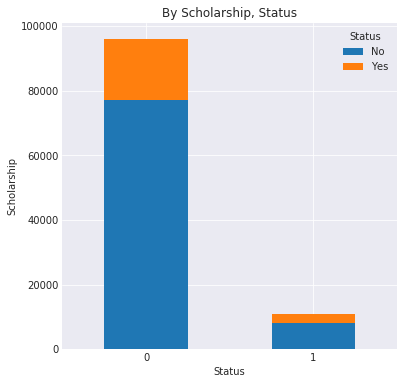

In [31]:
# Visualization of the welfare data and no-shows

my_plot = grouped.unstack().plot(kind='bar',stacked=True,title="By Scholarship, Status")
my_plot.set_xlabel("Status")
plt.xticks(rotation=0)
my_plot.set_ylabel("Scholarship")
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()


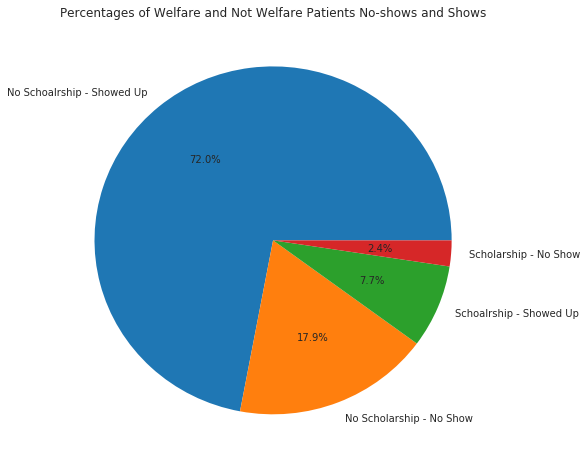

In [32]:
# Pie Chart visualization 
grouped = noshows_df.groupby(['Scholarship', 'Status']).size()
labels = ["No Schoalrship - Showed Up", "No Scholarship - No Show", "Schoalrship - Showed Up", "Scholarship - No Show"]

plt.pie(grouped, labels = labels, autopct='%1.1f%%')
#fig.set_title("Hello")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title("Percentages of Welfare and Not Welfare Patients No-shows and Shows")
plt.show()


#my_plot = noshows_df['Status'].value_counts().plot(kind='bar',title="Counts of No-shows (Yes) and Shows (No)")
#my_plot.set_xlabel("Status")
#plt.xticks(rotation=0)
#my_plot.set_ylabel("Count")
#plt.show()

# Recap of Analysis (4) Are Scholarship (Brazilian welfare) patients higher no-shows?

It appears welfare patients have a little higher percentage (4% => 24% to 20%) of no shows compared to non-welfare patients.
In addition, the pie chart shows that welfare no-shows made a up a very small percentage of no-shows. 

Finally, welfare patients made up about 10% of the total patients.

# Analysis (5) Appointments Scheduled by Day of Week

In [33]:
# Gget counts of appointments by day of week
grouped = noshows_df.groupby(['day_of_week']).size()
grouped


day_of_week
Friday       18372
Monday       22242
Saturday        22
Thursday     17518
Tuesday      25278
Wednesday    23544
dtype: int64

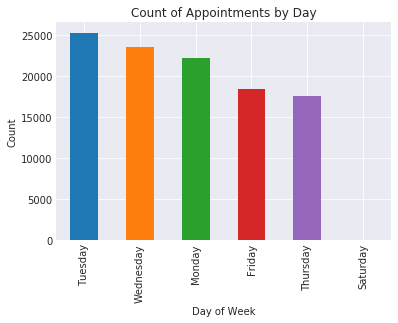

In [34]:
# Bar plot by day of week
my_plot = noshows_df['day_of_week'].value_counts().plot(kind='bar',title="Count of Appointments by Day")
my_plot.set_xlabel("Day of Week")
my_plot.set_ylabel("Count")
plt.show()


#  Recap of Analysis (5) Appointments Scheduled by Day of Week

Tuesday had the most scheduled appointments and Thursday had the lowest number of appointments during the week.
There appears to be no appointments on Sundays and an extremely low number of appointments on Saturdays. 


# (4) Conclusions

<b>Data Quality</b>

The data quality was not that bad. The biggest data issue I saw was in the Age data where there was negative numbers, zeros, and some very high numbers like 102 and 115. I did remove 3,551 of these records from the data set.

Finally, there were several column name typos that I fixed.

<b>Findings</b>

I was surprised in each analysis!

In the age distribution, my initial "guess" was that there would be more patients in the 66-99 category. It usually seems as you get older there is more of a need to visit the doctor. That is why you to do analysis on the data! :-)

I really thought texting would help decrease no-shows. However, almost 70% percent of the patients did not receive the text. I still think this is worth trying if possible and if it is not too costly.

It was extremely interesting to see how much more women visited the doctor compared to men. Why is that? Is it because women are better about getting checked out? Is it because men are more scared of doctors? LOL :-) Is it because women go through more changes in their bodies like pregnancy?

For the welfare and no-shows status, I thought before doing the analysis, welfare patients would have a higher percentage of no-shows. Is that me applying a stereotype? Was it such a low percentage (4%) because only 10% of the data set were on welfare?

Finally, the day of week and number of appointments surprised me in the fact there were 22 appointments on Saturday.
Why? Are these emergencies? Other than this, it did not shock me that the beginning of the week (Monday, Tuesday, Wednesday) had more appointments than the end of the week (Thursday, Friday).

<b>The more you think and look at the data, the more questions you have! That is why data analysis is so much fun!</b>



# (5) RESOURCES

# BOOK RESOURCES

(1) McKinney, Wes. (2018). Python for Data Analysis. Sebastopol, CA. O'Reilly Media. Inc.
<br>
(2) VanderPlas, Jake. (2017 Python Data Science Handbooks. Sebastopol, CA. O'Reilly Media. Inc.


# TRAINING  RESOURCES

(1) Udacity, Intro to Programming, https://www.udacity.com/course/intro-to-programming-nanodegree--nd000
<br>
(2) Udemy, Python A-Z™: Python For Data Science With Real Exercises!, https://www.udemy.com/python-coding/


# WEB RESOURCES

(01)  https://www.abgoswam.wordpress.com/2015/12/01/pandas-groupby-using-2-columns-visualize-using-bar-plot/
<br>
(02)  https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
<br>
(03)  https://www.kaggle.com/drgilermo/gender-based-patterns
<br>
(04)  https://www.kaggle.com/jfgobin/basic-visualisation-and-prediction
<br>
(05)  https://www.kaggle.com/residentmario/univariate-plotting-with-pandas
<br>
(06)  https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show
<br>
(07)  https://www.kaggle.com/thestats/analyzing-the-no-show
<br>
(08)  https://miamioh.instructure.com/courses/38817/pages/creating-graphical-displays
<br>
(09)  https://stackoverflow.com
<br>
(10) https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
